In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
csv_path = "https://raw.githubusercontent.com/tildataaviation/TIL-DATA-CODEALONG-2023/main/FlightFareData.csv"
df=pd.DataFrame([])
df=pd.read_csv(csv_path)
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


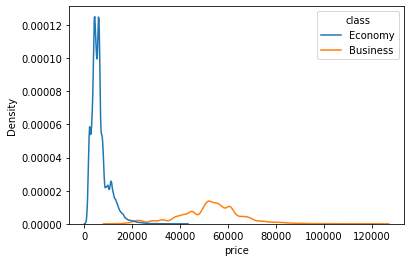

In [ ]:
sns.kdeplot(data=df, x="price",hue="class")

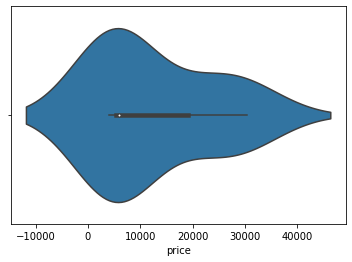

In [ ]:
price_agg = (df
    .groupby("airline")
    .agg(price=("price", "mean"), n=("airline", "count"))
)
sns.violinplot(data=price_agg,x="price",weights="n")

In [ ]:
df1=pd.DataFrame([])
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


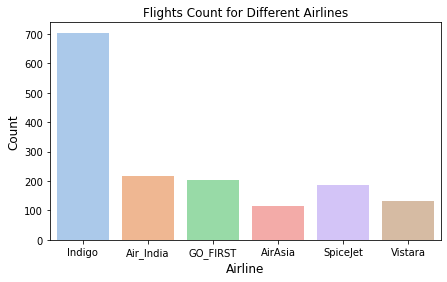

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(df1['airline'],palette='pastel')
plt.title('Flights Count for Different Airlines',fontsize=12)
plt.xlabel('Airline',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

In [ ]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

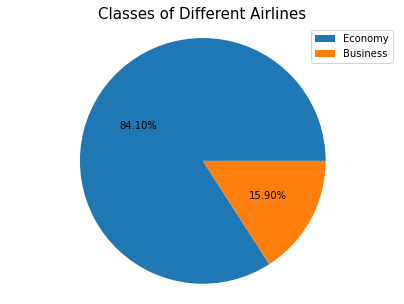

In [ ]:
plt.figure(figsize=(7,5))
plt.pie(df2['class'].value_counts(),autopct='%.2f%%')
plt.axis('equal')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

Text(0, 0.5, 'Price')

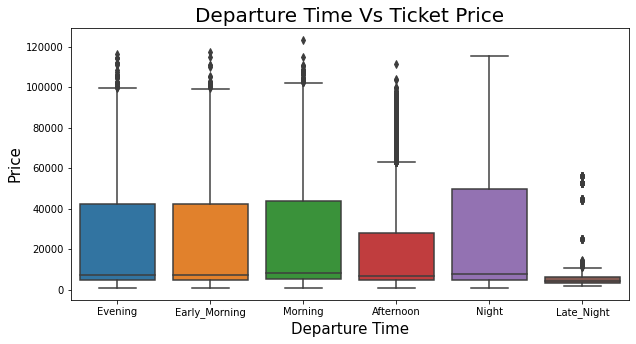

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)

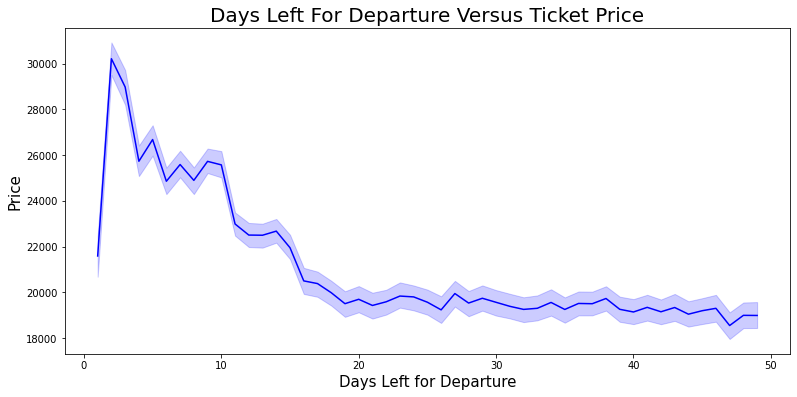

In [ ]:
plt.figure(figsize=(13,6))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()
